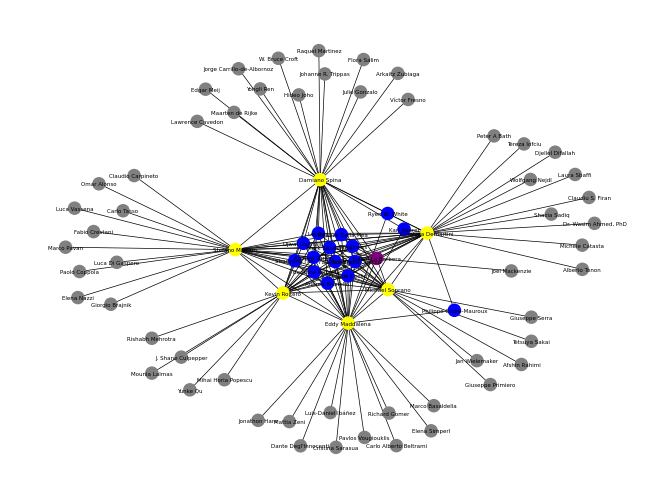

In [6]:
import requests
import pandas as pd
from serpapi import GoogleScholarSearch
import re
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
import pickle
from pyvis.network import Network
import json


df_nodes = pd.read_csv("data/nodes.csv")
#print(df_nodes)
df_edges = pd.read_csv("data/edges.csv")
#print(df_edges)


# 4. A partire dal grafo prodotto al punto 3:
# a. Generarne un secondo dove il numero di nodi è lo stesso, mentre il numero di
# archi è aumentato di 50 utilizzando la tecnica del Preferential Attachment.
# Salvare il grafo in locale nella cartella /graphs.
# b. Visualizzare e salvare il nuovo grafo come fatto al punto 3b


# read_gpickle()
with open("graphs/coauthorship_graph.pkl", 'rb') as f:  # notice the r instead of w
    grafo = pickle.load(f)

# Numero di archi da aggiungere
additional_edges = 50

# Calcolo degli archi preferenziali da aggiungere con la funzione preferential_attachment
pa_edges = list(nx.preferential_attachment(grafo))

# Ordinamento degli archi in base al loro peso
pa_edges.sort(key=lambda x: x[2], reverse=True)

# Estrazione dei primi 'additional_edges' archi con maggiore peso
selected_edges = pa_edges[:additional_edges]

# Aggiunta degli archi al grafo esistente
grafo.add_edges_from([(edge[0], edge[1]) for edge in selected_edges])



# write_gpickle()
with open("graphs/extended_coauthorship_graph.pkl", 'wb') as f:
    pickle.dump(grafo, f)


# Calcolo del grado di ciascun nodo
node_degrees = dict(grafo.degree())

# Definizione delle colorazioni in base al grado
node_colors = []
for node, degree in node_degrees.items():
    if degree == 1:
        node_colors.append('gray')
    elif 2 <= degree <= 10:
        node_colors.append('blue')
    elif 11 <= degree <= 20:
        node_colors.append('purple')
    else:
        node_colors.append('yellow')

# Estrazione delle etichette degli autori
#node_labels = nx.get_node_attributes(grafo, 'name')
#print(node_labels)


# Disegno del grafo
pos = nx.spring_layout(grafo)  # Puoi cambiare l'algoritmo di layout se preferisci
#nx.draw(grafo, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=8)
nx.draw(grafo, pos, with_labels=True, node_size=grafo.number_of_nodes(), node_color=node_colors, font_size=4, width = 0.5)

# Aggiunta delle etichette degli autori
#nx.draw_networkx_labels(grafo, pos, labels=node_labels, font_color='black')

plt.savefig("visualizations/extended_graph.pdf")

# Visualizzazione del grafo
plt.show()






